## Loading library

In [1]:
from xiespp import formation_energy

## Loading data from Materials Project
The input to the model can in formats like: CIF, POSCAR, PyMatGen Structure, ASE Atoms

In [2]:
from mp_api.client import MPRester

api_key = '__YOUR_API_KEY__'
api_key = 'pJmFwIk6qWCnMwEuGvzwLBT1qfdPpElH'
mpr = MPRester(api_key)

search = mpr.summary.search(chemsys="Si-O")
data_input = search[:10]

Retrieving SummaryDoc documents:   0%|          | 0/344 [00:00<?, ?it/s]

## Preparing data for passing to the model

In [3]:
gen = formation_energy.prepare_data(
    data_input=data_input, 
    # input_format= 'vasp', # Use this if the format of the file is not CIF file
)

Preparing image objects...
Checking image requirements...


100%|██████████| 10/10 [00:00<00:00, 74.64it/s]


Valid images:       8 /      10
Preparing point clouds...


100%|██████████| 8/8 [00:00<00:00, 3300.33it/s]


In [4]:
# Some crystals did not meet the condition of the formation energy calculation.
gen.df

,atoms,y,image,is_valid
0,[4m[1mMPDataDoc<SummaryDoc>[0;0m[0;0m\n[1...,1,3D Image - ID: mp-1219421,True
1,[4m[1mMPDataDoc<SummaryDoc>[0;0m[0;0m\n[1...,1,3D Image - ID: mp-16964,True
2,[4m[1mMPDataDoc<SummaryDoc>[0;0m[0;0m\n[1...,1,3D Image - ID: mp-559091,True
3,[4m[1mMPDataDoc<SummaryDoc>[0;0m[0;0m\n[1...,1,3D Image - ID: mp-560708,True
4,[4m[1mMPDataDoc<SummaryDoc>[0;0m[0;0m\n[1...,1,3D Image - ID: mp-558931,False
5,[4m[1mMPDataDoc<SummaryDoc>[0;0m[0;0m\n[1...,1,3D Image - ID: mp-7087,True
6,[4m[1mMPDataDoc<SummaryDoc>[0;0m[0;0m\n[1...,1,3D Image - ID: mp-32881,True
7,[4m[1mMPDataDoc<SummaryDoc>[0;0m[0;0m\n[1...,1,3D Image - ID: mp-6930,True
8,[4m[1mMPDataDoc<SummaryDoc>[0;0m[0;0m\n[1...,1,3D Image - ID: mp-11684,True
9,[4m[1mMPDataDoc<SummaryDoc>[0;0m[0;0m\n[1...,1,3D Image - ID: mp-667371,False


### Visualizing an image

In [14]:
from xiespp import CVR

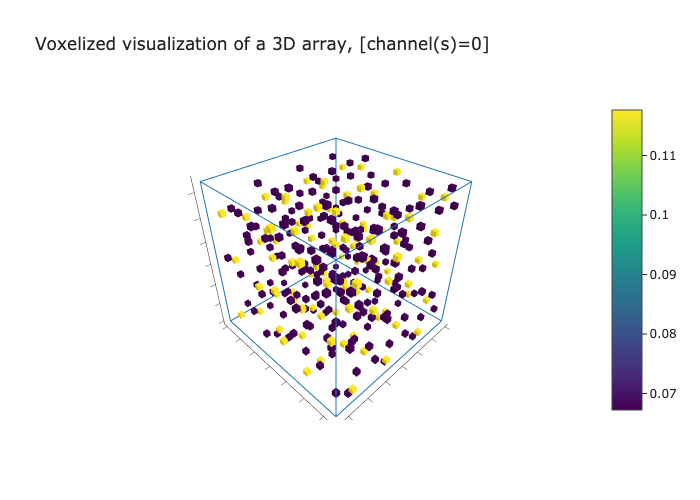

In [21]:
img = gen.df['image'][0]
fig = CVR.vv.voxel_interactive_plotly(img.get_image(), 
                                      box_filled=False,
                                      box_outline=True,
                                      channels=0, # Showing channel #0 (atomic number)
                                      )
fig.show(renderer="png")

## Making the predictions by the model

In [9]:
model = formation_energy.FormationEnergyPredictor()
model

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



<FormationEnergyPredictor: device=/device:CPU:0, ensemble=50>

In [10]:
yp = model.predict(gen, return_all_ensembles=True)

50/50 [==============================] - 30s 596ms/step


In [11]:
# Besides the final prediction (mean), all the single values of ensembles are being reported:
# The missing values are the ones that did not meet the criteria of the formation energy model
# The mean value is the final prediction of the model. 
# If return_all_ensembles is set to False, only the mean value is returned.
yp

,mean,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,-2.167284,-2.164894,-2.101233,-2.173645,-2.220716,-2.068967,-2.181787,-2.155600,-2.127329,-2.162006,-2.157973,-2.165743,-2.150070,-2.136909,-2.115495,-2.197090,-2.074531,-2.367909,-2.175136,-2.178304,-2.146806,-2.245815,-2.218024,-2.305108,-2.131408,-2.183154,-2.073166,-2.199940,-2.017838,-2.129961,-2.162408,-2.310718,-2.118469,-2.220581,-2.284493,-2.109766,-2.193466,-2.270651,-2.192573,-2.150594,-2.120005,-2.169666,-2.073455,-2.150582,-2.142559,-2.084252,-2.011950,-2.254631,-2.201219,-2.280266,-2.135353
1,-3.253676,-3.295523,-3.218916,-3.305878,-3.233608,-3.315525,-3.272371,-3.324240,-3.310596,-3.183025,-3.198774,-3.319367,-3.212387,-3.313112,-3.275881,-3.330056,-3.201195,-3.181370,-3.304974,-3.262841,-3.230810,-3.246325,-3.169087,-3.237545,-3.255565,-3.261572,-3.156258,-3.244847,-3.236364,-3.309501,-3.236129,-3.250239,-3.316131,-3.222560,-3.299155,-3.222913,-3.290580,-3.328282,-3.262318,-3.257168,-3.322804,-3.195704,-3.280978,-3.253420,-3.124438,-3.228105,-3.213860,-3.173481,-3.271765,-3.251513,-3.274720
2,-3.221661,-3.250412,-3.189190,-3.149020,-3.158593,-3.265219,-3.330866,-3.249656,-3.103453,-3.212500,-3.163736,-3.258360,-3.237974,-3.189154,-3.282788,-3.288640,-3.180470,-3.264698,-3.288642,-3.264637,-3.213326,-3.246124,-3.190158,-3.255122,-3.274411,-3.161932,-3.240110,-3.161399,-3.142045,-3.116344,-3.244959,-3.199473,-3.192884,-3.250736,-3.220651,-3.270339,-3.320257,-3.266767,-3.227966,-3.203934,-3.127331,-3.237422,-3.185505,-3.252772,-3.248586,-3.297496,-3.170658,-3.197282,-3.221860,-3.227841,-3.189372
3,-3.181098,-3.166312,-3.184871,-3.312016,-3.255219,-3.086185,-3.235004,-3.257750,-3.174383,-3.185336,-3.261577,-3.151542,-3.177155,-3.179405,-3.041978,-3.366714,-3.189731,-3.194608,-3.103204,-3.162751,-3.173461,-3.234357,-3.161476,-3.232929,-3.166528,-3.193272,-3.075960,-3.091266,-3.161764,-3.128969,-3.106947,-3.285477,-3.126280,-3.169618,-3.168428,-3.158384,-2.992332,-3.287596,-3.236315,-3.105247,-3.201096,-3.114712,-3.182177,-3.149596,-3.229279,-3.147575,-3.174810,-3.269586,-3.152972,-3.270755,-3.219997
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-3.252608,-3.313522,-3.259411,-3.216492,-3.290350,-3.320675,-3.197521,-3.265516,-3.329868,-3.278863,-3.216463,-3.255759,-3.168918,-3.232213,-3.256886,-3.146141,-3.331108,-3.243092,-3.244424,-3.169938,-3.219416,-3.207848,-3.205652,-3.191769,-3.305427,-3.418125,-3.218389,-3.320931,-3.287008,-3.195849,-3.130188,-3.283896,-3.320748,-3.328776,-3.170852,-3.223044,-3.352426,-3.247303,-3.200200,-3.200438,-3.323274,-3.207526,-3.258779,-3.234828,-3.313783,-3.270126,-3.227487,-3.298720,-3.203030,-3.230890,-3.296526
6,-0.562573,-0.607019,-0.544663,-0.644360,-0.542681,-0.554483,-0.556513,-0.623469,-0.569717,-0.653911,-0.448308,-0.629777,-0.566741,-0.549304,-0.497406,-0.562577,-0.546177,-0.533635,-0.619590,-0.599270,-0.497112,-0.608623,-0.511075,-0.515374,-0.529020,-0.526762,-0.577181,-0.489476,-0.519469,-0.616164,-0.565616,-0.572808,-0.514097,-0.648469,-0.526363,-0.497047,-0.539720,-0.424294,-0.490860,-0.477526,-0.698595,-0.532932,-0.575820,-0.669734,-0.577752,-0.499391,-0.562968,-0.595482,-0.685055,-0.624325,-0.609955
7,-3.208578,-3.062743,-3.264846,-3.273140,-3.199792,-3.298182,-3.268248,-3.196929,-3.189782,-3.139403,-3.226876,-3.284786,-3.182692,-3.198625,-3.185225,-3.254438,-3.176708,-3.200178,-3.144477,-3.216619,-3.183097,-3.154462,-3.187505,-3.251120,-3.194111,-3.193362,-3.144614,-3.210026,-3.236633,-3.225435,-3.234699,-3.227209,-3.150670,-3.272720,-3.284182,-3.232766,-3.206501,-3.220882,-3.292249,-3.215630,-3.173415,-3.158079,-3.187051,-3.213442,-3.205980,-3.209713,-3.171460,-3.195881,-3.173977,-3.245857,-3.212483
8,-3.198319,-3.177821,-3.186000,-3.225955,-3.090585,-3.205856,-3

## Command line usage:
~~~sh
(syn) ➜  ~ xiespp_formation_energy --test -v
~~~
Results:
~~~
Running on test samples: ['/Users/ali/mambaforge/envs/syn/lib/python3.8/site-packages/xiespp-1.0.700-py3.8.egg/xiespp/synthesizability_1/data/GaN/GaN_9.cif', '/Users/ali/mambaforge/envs/syn/lib/python3.8/site-packages/xiespp-1.0.700-py3.8.egg/xiespp/synthesizability_1/data/GaN/GaN_12.cif']
Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Reading CIF files...
100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 46.16it/s]
Preparing image objects...
Checking image requirements...
100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 328.30it/s]
Valid images:       2 /       2
Preparing point clouds...
100%|███████████████████████████████████████████| 2/2 [00:00<00:00, 1349.52it/s]
50/50 [==============================] - 8s 148ms/step
[-0.5372748589515686, 0.25509491860866546]
~~~

~~~sh
(syn) ➜  ~ xiespp_formation_energy -f Downloads/LiF.POSCAR --format vasp
~~~
Results:
~~~
[-3.127022614479065]
~~~